<a href="https://colab.research.google.com/github/manjuiitm/mlprojects/blob/main/CTR/CTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ads CTR Analysis stands for Click-Through Rate Analysis for advertisements. Ads CTR Analysis is the process of examining the effectiveness of online advertisements by measuring the rate at which users click on an ad’s link to reach the advertiser’s website. If you want to learn how to perform Ads CTR Analysis, this article is for you. In this article, I’ll take you through the task of Ads CTR Analysis and Forecasting using Python.

# Ads CTR Forecasting: Process We Can Follow

Ads CTR Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. Below are the steps we can follow for the task of Ads CTR Analysis and Forecasting:

Gather ad data, including the number of ad impressions (how often an ad was shown), the number of clicks, and any other relevant metrics.
Explore the data to understand its characteristics and distribution. Calculate basic statistics, such as the mean CTR (Click-Through Rate) and standard deviation.
Create visualizations, such as line charts or bar graphs, to represent CTR trends over time.
Conduct A/B tests if necessary to compare the performance of different ad variations.
Analyze the CTR data to identify factors that influence ad performance.
Build a forecasting model to predict future CTR values.
So, the process begins with collecting data. I found an ideal dataset for the task of Ads CTR Analysis and Forecasting

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("ctr.csv")
print(data.head())

         Date  Clicks  Impressions
0  2022-10-19    2851        58598
1  2022-10-20    2707        57628
2  2022-10-21    2246        50135
3  2022-10-22    1686        40608
4  2022-10-23    1808        41999


###Let’s start by converting the Date column in the DataFrame from a string format to a datetime format and then setting it as the index of the DataFrame:
# Data Preparation

In [10]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date', inplace=True)

In [11]:
# Visualize Clicks and Impressions
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Clicks'], mode='lines', name='Clicks'))
fig.add_trace(go.Scatter(x=data.index, y=data['Impressions'], mode='lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

In [13]:
# Create a scatter plot to visualize the relationship between Clicks and Impressions
fig = px.scatter(data, x='Clicks', y='Impressions', title='Relationship Between Clicks and Impressions',
                 labels={'Clicks': 'Clicks', 'Impressions': 'Impressions'})

# Customize the layout
fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')

# Show the plot
fig.show()

In [14]:
# Calculate and visualize CTR
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100
fig = px.line(data, x=data.index, y='CTR', title='Click-Through Rate (CTR) Over Time')
fig.show()

In [16]:
data['DayOfWeek'] = data.index.dayofweek
data['WeekOfMonth'] = (data.index.day - 1) // 7 + 1

# EDA based on DayOfWeek
day_of_week_ctr = data.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = px.bar(day_of_week_ctr, x='Days Of Week', y='CTR', title='Average CTR by Day of the Week')
fig.show()

# Now, let’s compare the CTR on weekdays and weekends:

In [17]:
# Create a new column 'DayCategory' to categorize weekdays and weekends
data['DayCategory'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average CTR for weekdays and weekends
ctr_by_day_category = data.groupby('DayCategory')['CTR'].mean().reset_index()

# Create a bar plot to compare CTR on weekdays vs. weekends
fig = px.bar(ctr_by_day_category, x='DayCategory', y='CTR', title='Comparison of CTR on Weekdays vs. Weekends',
             labels={'CTR': 'Average CTR'})

# Customize the layout
fig.update_layout(yaxis_title='Average CTR')

# Show the plot
fig.show()

# Now, let’s compare the impressions and clicks on weekdays and weekends:

In [18]:
# Group the data by 'DayCategory' and calculate the sum of Clicks and Impressions for each category
grouped_data = data.groupby('DayCategory')[['Clicks', 'Impressions']].sum().reset_index()

# Create a grouped bar chart to visualize Clicks and Impressions on weekdays vs. weekends
fig = px.bar(grouped_data, x='DayCategory', y=['Clicks', 'Impressions'],
             title='Impressions and Clicks on Weekdays vs. Weekends',
             labels={'value': 'Count', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='Day Category')

# Show the plot
fig.show()

Ads CTR Forecasting Now, let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model:

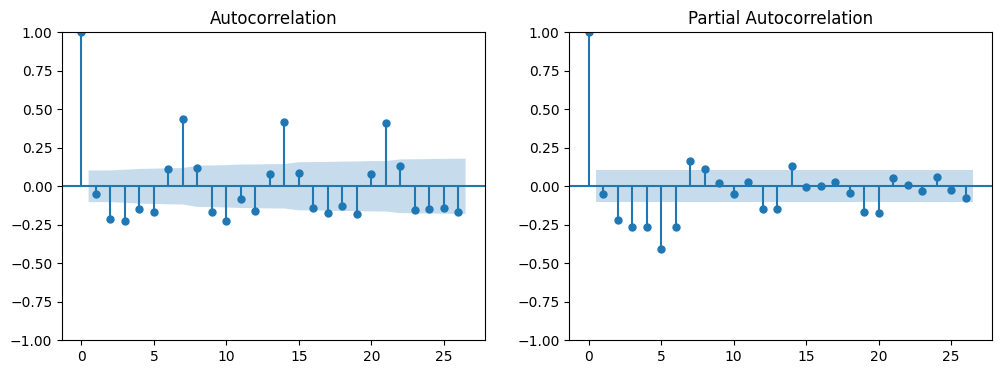

In [19]:
data.reset_index(inplace=True)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# resetting index
time_series = data.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

The value of p, d, and q will be one here. And as we are using the SARIMA model here, the value of s will be 12.

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.365
Date:                            Fri, 10 Jan 2025   AIC                            152.730
Time:                                    21:52:01   BIC                            172.048
Sample:                                10-19-2022   HQIC                           160.418
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5266      0.070      7.513      0.000       0.389       0.664
ma.L1         -0.9049      0.036   

In [21]:
# Predict future values
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852350
2023-10-20    3.889426
2023-10-21    3.820260
2023-10-22    3.727494
2023-10-23    3.710360
                ...   
2024-01-22    3.545574
2024-01-23    3.466648
2024-01-24    3.561193
2024-01-25    3.546697
2024-01-26    3.580132
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [22]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

###Summary
###So, this is how we can analyze and forecast CTR using Python. Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance.